<a href="https://colab.research.google.com/github/akshaychiluka/retail-analysis/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
trxn = pd.read_csv('Retail_Data_Transactions.csv')

In [ ]:
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [ ]:
response = pd.read_csv('Retail_Data_Response.csv')

In [ ]:
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [ ]:
df = trxn.merge(response,on='customer_id' , how='left')

#df

df.dtypes
df.shape
df.head(5)

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [ ]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [ ]:
df.isnull().sum()

,0
customer_id,0
trans_date,0
tran_amount,0
response,31


In [ ]:
df=df.dropna()

In [ ]:
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [ ]:
df['trans_date']=pd.to_datetime(df['trans_date'])
df['response']=df['response'].astype('int64')

<ipython-input-14-1bd6720af92b>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']=pd.to_datetime(df['trans_date'])


In [ ]:
df.dtypes

,0
customer_id,object
trans_date,datetime64[ns]
tran_amount,int64
response,int64


In [ ]:
set(df['response'])

{0, 1}

In [ ]:
#check for outliers
#z score

from scipy import stats
import numpy as np

z=np.abs(stats.zscore(df['tran_amount']))

threshold = 3

outlier = z>threshold
print(df[outlier])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


In [ ]:
#check for outliers
#z score

from scipy import stats
import numpy as np

z=np.abs(stats.zscore(df['response']))

threshold = 3

outlier = z>threshold
print(df[outlier])

Empty DataFrame
Columns: [customer_id, trans_date, tran_amount, response]
Index: []


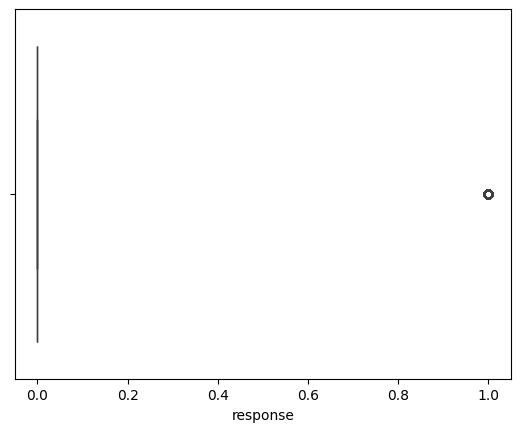

In [ ]:
import seaborn as sbs
import matplotlib.pyplot as plt

sbs.boxplot(x=df['response'])
plt.show()

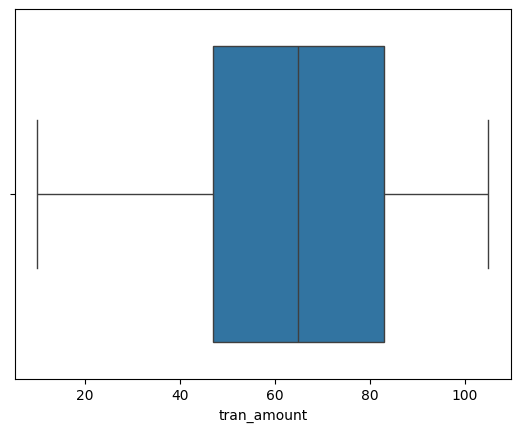

In [ ]:
import seaborn as sbs
import matplotlib.pyplot as plt

sbs.boxplot(x=df['tran_amount'])
plt.show()

In [ ]:
#creating new columns

df['month']=df['trans_date'].dt.month

In [ ]:
df

,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [ ]:
#which 3 months have gad the highest transaction amounts?

monthly_sales= df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index().head(3)
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089


In [ ]:
cust_count=df['customer_id'].value_counts().reset_index()
cust_count.colums=['customer_id','count']
top_5=cust_count.sort_values(by='count' , ascending=False).head(5)
top_5

<ipython-input-24-e09d3e0bc4cf>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  cust_count.colums=['customer_id','count']


,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

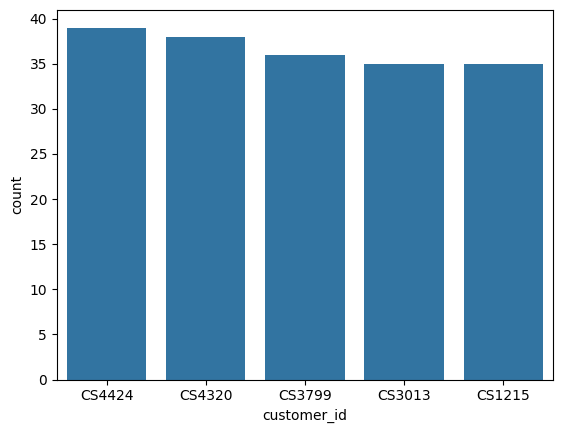

In [ ]:
sbs.barplot(x='customer_id',y='count' , data=top_5)

In [ ]:
cust_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()
#cust_count.colums=['customer_id','count']
top_5_sales=cust_sales.sort_values(by='tran_amount' , ascending=False).head(5)
top_5_sales

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

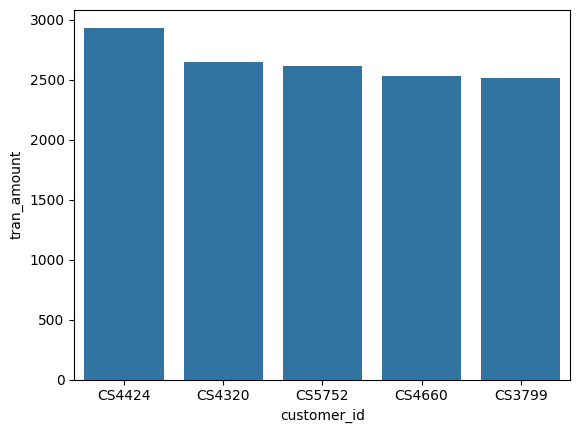

In [ ]:
sbs.barplot(x='customer_id',y='tran_amount' , data=top_5_sales)

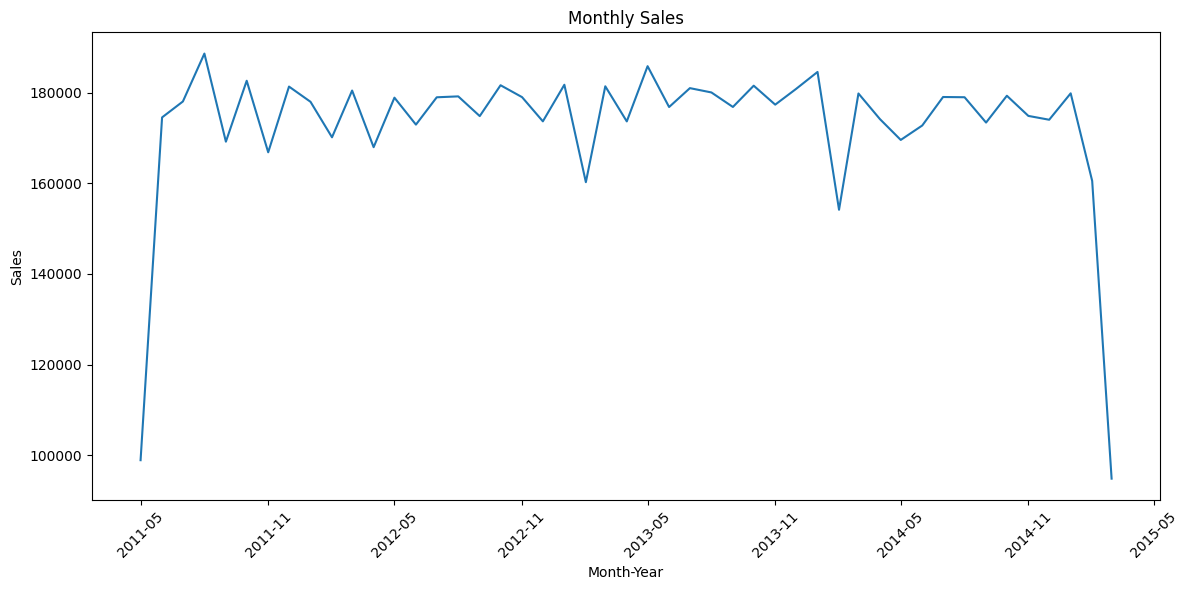

In [ ]:
import matplotlib.dates as mdates

df['month_year']=df['trans_date'].dt.to_period('M')
monthly_sales = df.groupby('month_year')['tran_amount'].sum()

type(monthly_sales.index)
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index,monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


COHORT SEGEMENTATION

In [ ]:
#Recency
recency = df.groupby('customer_id')['trans_date'].max()
recency

# Sorted the data by customer_id and trans_date
data_sorted = df.sort_values(['customer_id', 'trans_date'])
data_sorted

## Calculate recency for each customer
data_sorted['recency'] = data_sorted.groupby('customer_id')['trans_date'].diff().dt.days
data_sorted

#frequncy
frequncy = df.groupby('customer_id')['trans_date'].count()
frequncy

#Monetary (CMV)
monetary = df.groupby('customer_id')['tran_amount'].sum()
monetary

#combine
rfm= pd.DataFrame({'recency':recency,'frequency':frequncy,'monetary':monetary})
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [ ]:
#customer segmentation

def segment_customer(row):
  if row['recency'].year>=2012 and row['frequency']>=15 and row['monetory']>1000:
    return 'P0'
  elif (2011<=row['recency'].year<2012) and (10<=row['frequency']<15) and (500<=row['monetory']<=1000):
    return 'P1'
  else:
    return 'P2'

  rfm['Segemnt']= rfm.apply(segment_customer,axis=1)

In [ ]:
rfm

,recency,frequency,monetory
customer_id,,,
CS1112,2015-01-14,15,1012
CS1113,2015-02-09,20,1490
CS1114,2015-02-12,19,1432
CS1115,2015-03-05,22,1659
CS1116,2014-08-25,13,857
...,...,...,...
CS8996,2014-12-09,13,582
CS8997,2014-06-28,14,543
CS8998,2014-12-22,13,624


In [ ]:
def segment_customer(row):
    if row['recency'] and row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif (row['recency'].year < 2012 and row['recency'].year >= 2011) and (row['frequency'] < 15 and row['frequency'] > 10) and (row['monetary'] <= 1000 and row['monetary'] >= 500):
        return 'P1'
    else:
        return 'P2'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
print(set(rfm['Segment']))

{'P0', 'P2'}


In [ ]:
rfm

,recency,frequency,monetary,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


<Axes: xlabel='response'>

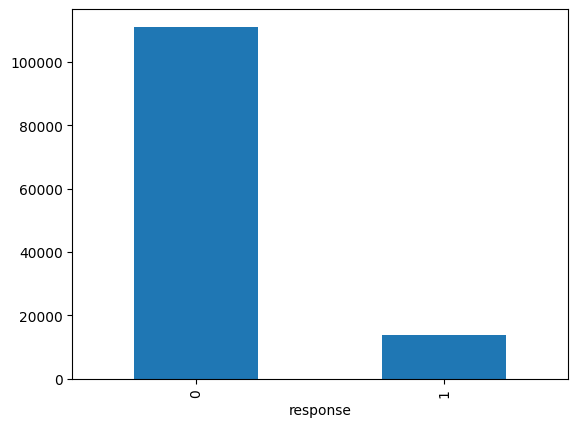

In [ ]:
#Count the number of churend and active members

churn_counts = df['response'].value_counts()

#plot
churn_counts.plot(kind='bar')

<Axes: xlabel='month'>

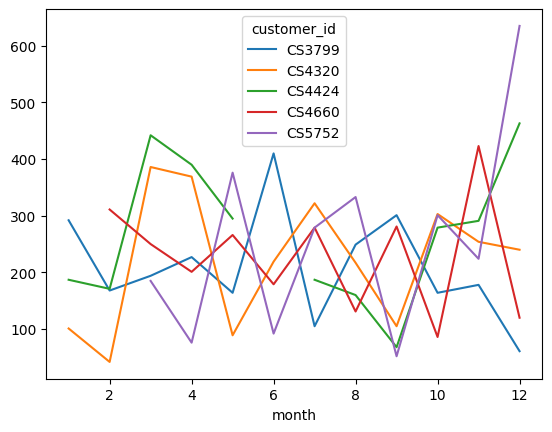

In [ ]:
#Analyzing top customers
top_5_cust=monetory.sort_values(ascending=False).head(5).index

top_5_cust_df=df[df['customer_id'].isin(top_5_cust)]

top_customer_sales=top_5_cust_df.groupby(['customer_id','month'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')

In [ ]:
df.to_csv('MainData.csv')
rfm.to_csv('AdditionalAnalysis.csv')